In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Reading Data

In [3]:
wine_df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


* fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* citric acid: found in small quantities, citric acid can add ‘freshness’ and flavor to wines
* residual sugar: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
* chlorides: the amount of salt in the wine
* free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
* total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
* density: the density of water is close to that of water depending on the percent alcohol and sugar content
* pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
* sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
* quality: score between 0 and 10
* alcohol: the percent alcohol content of the wine - output varaible

In [4]:
print("Number of rows, and columns in the dataset", wine_df.shape)

Number of rows, and columns in the dataset (1599, 12)


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Above table shows two columns "total sulfur dioxide", and "free sulfur dioxide" have high value.

Checking missing values

In [7]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing values in the dataset.

Visualize Variables

<AxesSubplot:>

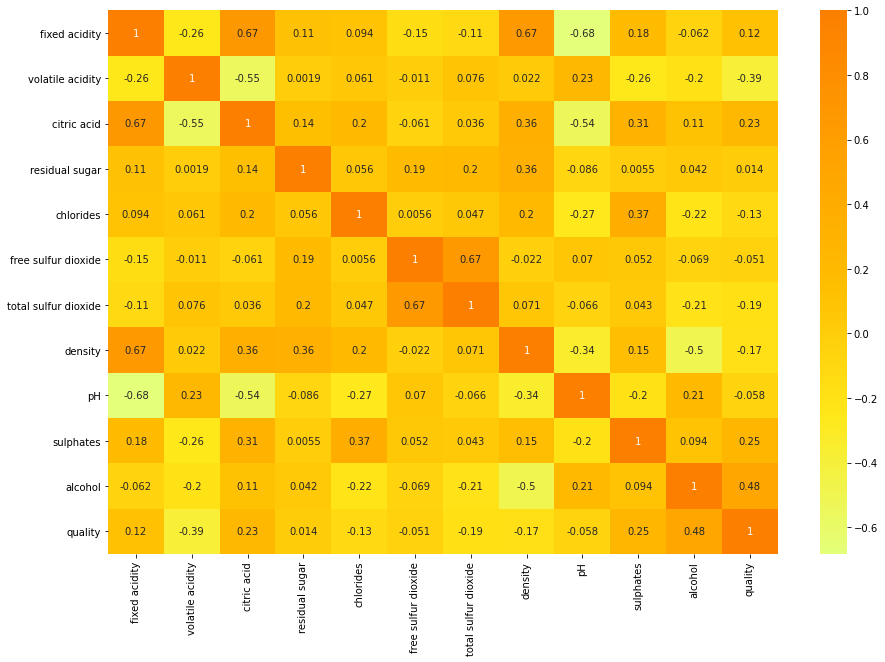

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(wine_df.corr(),cmap = 'Wistia', annot =True )

Splitting the Dataset into Train and Test

In [9]:
X = wine_df.drop('quality', axis = 1)
y = wine_df['quality']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

Building the model

In [11]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [12]:
coeff = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])
coeff

,Coefficient
fixed acidity,0.003299
volatile acidity,-1.116009
citric acid,-0.163674
residual sugar,0.017637
chlorides,-1.731061
free sulfur dioxide,0.004267
total sulfur dioxide,-0.003286
density,-0.104331
pH,-0.503768
sulphates,0.818729


In [13]:
lm.intercept_

4.718324704725264

In [14]:
y_pred = lm.predict(X_test)

In [15]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              7260.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):                        0.00
Time:                        19:31:06   Log-Likelihood:                         -1134.5
No. Observations:                1119   AIC:                                      2291.
Df Residuals:                    1108   BIC:                                      2346.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [16]:
X.drop('density',axis=1, inplace=True)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.180e+04
Date:                Tue, 07 Sep 2021   Prob (F-statistic):                        0.00
Time:                        19:31:06   Log-Likelihood:                         -1595.7
No. Observations:                1599   AIC:                                      3211.
Df Residuals:                    1589   BIC:                                      3265.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [17]:
X.drop('fixed acidity',axis=1, inplace=True)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.273e+04
Date:                Tue, 07 Sep 2021   Prob (F-statistic):                        0.00
Time:                        19:31:06   Log-Likelihood:                         -1619.4
No. Observations:                1599   AIC:                                      3257.
Df Residuals:                    1590   BIC:                                      3305.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [18]:
X.drop('residual sugar',axis=1, inplace=True)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.432e+04
Date:                Tue, 07 Sep 2021   Prob (F-statistic):                        0.00
Time:                        19:31:06   Log-Likelihood:                         -1619.9
No. Observations:                1599   AIC:                                      3256.
Df Residuals:                    1591   BIC:                                      3299.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [19]:
X.drop('citric acid',axis=1, inplace=True)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.619e+04
Date:                Tue, 07 Sep 2021   Prob (F-statistic):                        0.00
Time:                        19:31:06   Log-Likelihood:                         -1629.0
No. Observations:                1599   AIC:                                      3272.
Df Residuals:                    1592   BIC:                                      3310.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [20]:
y_pred = lm.predict(X_test)

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 0.46979457106703887
MSE: 0.3536432777633594
RMSE: 0.5946791384968532


In [22]:
print(X_train.head)

R_square = lm.score(X_train,y_train)
print('R squared: ',R_square)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1237            7.1             0.750         0.01             2.2      0.059   
567             8.7             0.700         0.24             2.5      0.226   
461             8.3             0.615         0.22             2.6      0.087   
1238            8.1             0.730         0.00             2.5      0.081   
454             7.0             0.230         0.40             1.6      0.063   
...             ...               ...          ...             ...        ...   
1512            6.4             0.790         0.04             2.2      0.061   
950             8.9             0.120         0.45             1.8      0.075   
1064            8.2             0.740         0.09             2.0      0.067   
742             6.5             0.615         0.00             1.9      0.065   
595             8.9             0.595         0.41             7.9      0.086  

In [23]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square)
VIF

1.517596062273183

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


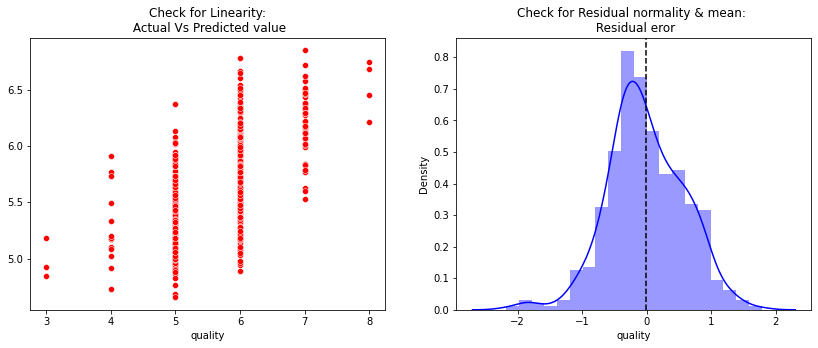

In [24]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

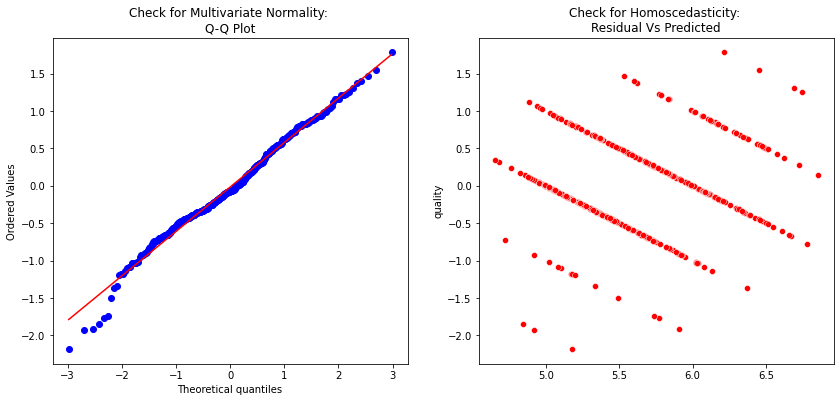

In [25]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');